### Лабораторная работа №3. 100,000 UK Used Car Data set
https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes

Задание:

1. Набор данных для группы 3530903_70302: Mercedes<br>
2. Разбить данные на тренировочные и тестовые (70% на 30%, random_state=10).
3. Попытаться обучить регрессии c лучшим качеством. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
auto_data = pd.read_csv("merc.csv")
auto_data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
...,...,...,...,...,...,...,...,...,...
13114,C Class,2020,35999,Automatic,500,Diesel,145,55.4,2.0
13115,B Class,2020,24699,Automatic,2500,Diesel,145,55.4,2.0
13116,GLC Class,2019,30999,Automatic,11612,Diesel,145,41.5,2.1
13117,CLS Class,2019,37990,Automatic,2426,Diesel,145,45.6,2.0


In [3]:
auto_data.std()

year              2.224709
price         11842.675542
mileage       21176.512267
tax              65.260286
mpg              15.220082
engineSize        0.572426
dtype: float64

In [4]:
#sns.pairplot(auto_data)

In [5]:
# new_auto_data = auto_data.drop(['model', 'transmission', 'fuelType'], axis = 1)

# plt.figure(figsize=(18,10))
# for i, column in enumerate(new_auto_data.columns):
#     plt.subplot(2, 3, i + 1)
#     plt.scatter(new_auto_data[column], new_auto_data['price'])
#     plt.xlabel(column)
#     plt.ylabel('price')

<AxesSubplot:>

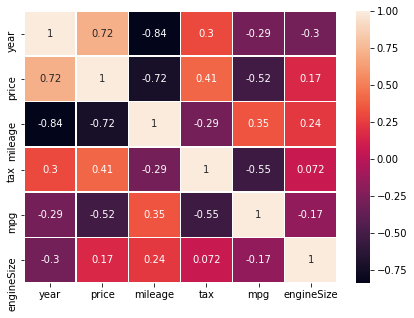

In [6]:
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(auto_data.corr(method='spearman'), annot = True, linewidths=0.7, ax=ax)

<h4>Внесём номинальные признаки

In [7]:
new_auto_data = pd.concat([
    auto_data.drop(['model', 'transmission', 'fuelType'], axis = 1), 
    pd.get_dummies(auto_data['model']),
    pd.get_dummies(auto_data['transmission']),
    pd.get_dummies(auto_data['fuelType'])], axis = 1)
new_auto_data.head()

,year,price,mileage,tax,mpg,engineSize,A Class,B Class,C Class,CL Class,...,220,230,Automatic,Manual,Other,Semi-Auto,Diesel,Hybrid,Other,Petrol
0,2005,5200,63000,325,32.1,1.8,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2017,34948,27000,20,61.4,2.1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,2016,49948,6200,555,28.0,5.5,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,2016,61948,16000,325,30.4,4.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,2016,73948,4000,325,30.1,4.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [8]:
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

<h4>LinearRegression (без номинальных признаков, так как слишком высокая ошибка)

In [9]:
X = auto_data.drop(['model', 'transmission', 'fuelType', 'price'], axis=1) 
Y = auto_data['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

std_scaler = StandardScaler()

X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

simple_LR = LinearRegression()

simple_LR.fit(X_train_scaled, Y_train)
simple_LR_predictions = simple_LR.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, simple_LR_predictions, squared = False), 3)}')
print (f'Test std = {round(Y_test.std(), 3)}', '\n')
# print(pd.DataFrame(simple_LR.coef_, auto_data.drop(['model', 'transmission', 'fuelType'], axis=1).columns[1:], columns=['Coefficients']))
# print(f'intercept    {round(simple_LR.intercept_, 3)}')

RMSE = 6875.358
Test std = 12330.882 



(Другие методы без номинальных признаков дают тот же результат)

In [10]:
X = new_auto_data.drop(['price'], axis=1) 
Y = new_auto_data['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

std_scaler = StandardScaler()

X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

<h4>Lasso

In [11]:
model_Lasso = Lasso()

model_Lasso.fit(X_train_scaled, Y_train)
predictions_Lasso = model_Lasso.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions_Lasso, squared=False), 3)}')
print (f'Test std = {round(Y_test.std(), 3)}', '\n')
# print(pd.DataFrame(model_Lasso.coef_, new_auto_data.columns[1:], columns=['Coefficients']))
# print(f'intercept    {round(model_Lasso.intercept_, 3)}')

RMSE = 6007.6
Test std = 12330.882 



c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 144686417.86523438, tolerance: 124132548.47634783
  positive)


<h4>LassoCV

In [12]:
model_LassoCV = LassoCV(random_state=10)

model_LassoCV.fit(X_train_scaled, Y_train)
predictions_LassoCV = model_LassoCV.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions_LassoCV, squared=False), 3)}')
print (f'Test std = {round(Y_test.std(), 3)}', '\n')
# print(pd.DataFrame(model_LassoCV.coef_, new_auto_data.columns[1:], columns=['Coefficients']))
# print(f'intercept    {round(model_LassoCV.intercept_, 3)}')

RMSE = 6009.999
Test std = 12330.882 



<h4>Ridge

In [13]:
model_Ridge = Ridge()

model_Ridge.fit(X_train_scaled, Y_train)
predictions_Ridge = model_Ridge.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions_Ridge, squared=False), 3)}')
print (f'Test std = {round(Y_test.std(), 3)}', '\n')
# print(pd.DataFrame(model_Ridge.coef_, new_auto_data.columns[1:], columns=['Coefficients']))
# print(f'intercept    {round(model_Ridge.intercept_, 3)}')

RMSE = 6007.52
Test std = 12330.882 



<h4>RidgeCV

In [14]:
model_RidgeCV = RidgeCV()

model_RidgeCV.fit(X_train_scaled, Y_train)
predictions_RidgeCV = model_RidgeCV.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions_RidgeCV, squared=False), 3)}')
print (f'Test std = {round(Y_test.std(), 3)}', '\n')
# print(pd.DataFrame(model_RidgeCV.coef_, new_auto_data.columns[1:], columns=['Coefficients']))
# print(f'intercept    {round(model_RidgeCV.intercept_, 3)}')

RMSE = 6008.78
Test std = 12330.882 



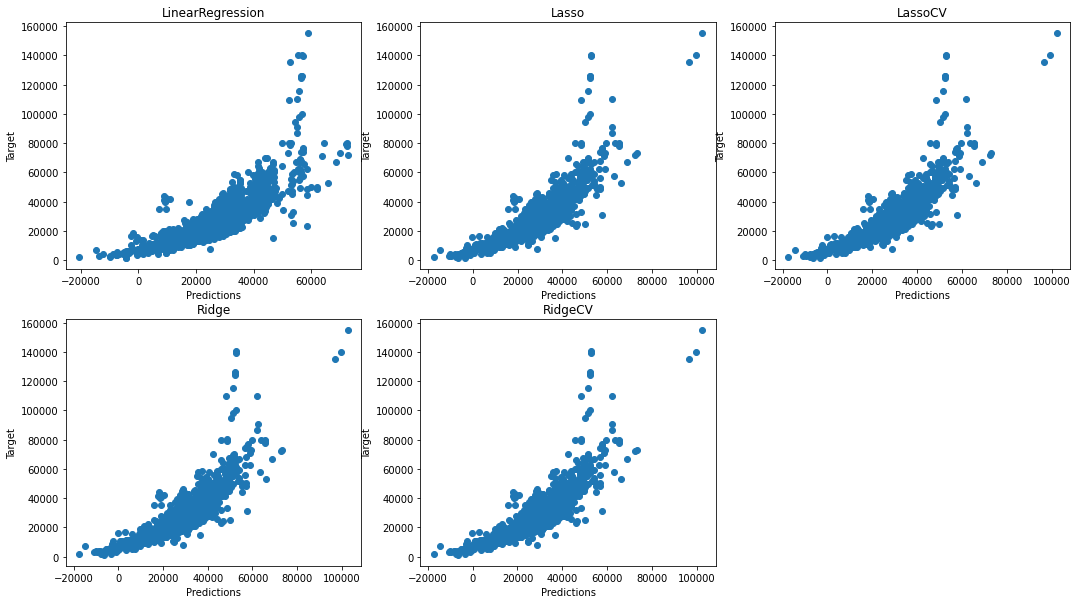

In [15]:
predictions = {
    'LinearRegression' : simple_LR_predictions, 
    'Lasso' : predictions_Lasso, 
    'LassoCV' : predictions_LassoCV, 
    'Ridge' : predictions_Ridge, 
    'RidgeCV' : predictions_RidgeCV
}

plt.figure(figsize=(18,10))
for i, key in enumerate(predictions.keys()):
    plt.subplot(2, 3, i + 1)
    plt.scatter(predictions[key], Y_test)
    plt.title(key)
    plt.xlabel('Predictions')
    plt.ylabel('Target')

<h4>Поперебираем альфа

In [16]:
alphas = np.linspace(1, 10, 20)

model_RidgeCV_alpha = RidgeCV(alphas=alphas)

model_RidgeCV_alpha.fit(X_train_scaled, Y_train)
predictions_RidgeCV_alpha = model_RidgeCV_alpha.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions_RidgeCV_alpha, squared=False), 3)}')
print (f'Test std = {round(Y_test.std(), 3)}', '\n')
# print(pd.DataFrame(model_RidgeCV_alpha.coef_, new_auto_data.columns[1:], columns=['Coefficients']))
# print(f'intercept    {round(model_RidgeCV_alpha.intercept_, 3)}')

RMSE = 6008.78
Test std = 12330.882 



(LassoCV ситуацию также не улучшил)

<h4>Рассмотрим некоторые вещественные признаки как номинальные

In [17]:
auto_data_dummy = pd.concat([
    new_auto_data.drop(['engineSize', 'tax', 'year', 'mpg'], axis = 1),
    pd.get_dummies(auto_data['engineSize']),
    pd.get_dummies(auto_data['tax']),
    pd.get_dummies(auto_data['year']),
    pd.get_dummies(auto_data['mpg'])], axis = 1)
auto_data_dummy.head()

,price,mileage,A Class,B Class,C Class,CL Class,CLA Class,CLC Class,CLK,CLS Class,...,78.5,80.7,100.9,122.8,122.9,134.5,176.6,188.3,201.8,217.3
0,5200,63000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34948,27000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,49948,6200,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,61948,16000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,73948,4000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
X = auto_data_dummy.drop(['price'], axis=1) 
Y = auto_data_dummy['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

std_scaler = StandardScaler()

X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

model_Ridge_dummy = Ridge()

model_Ridge_dummy.fit(X_train_scaled, Y_train)
predictions_Ridge_dummy = model_Ridge_dummy.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions_Ridge_dummy, squared = False), 3)}')
print (f'Test std = {round(Y_test.std(), 3)}', '\n')

RMSE = 4062.105
Test std = 12330.882 



Text(0, 0.5, 'Target')

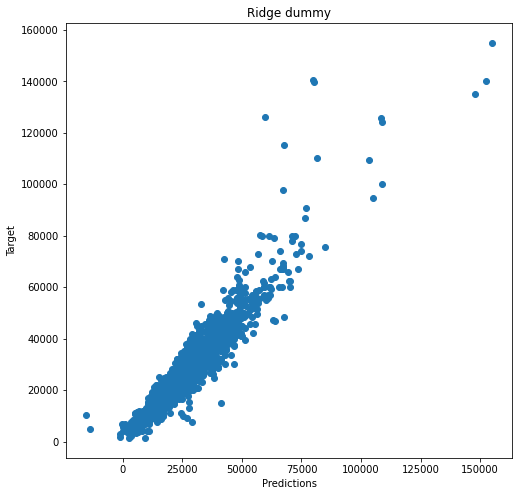

In [19]:
plt.figure(figsize=(8,8))
plt.scatter(predictions_Ridge_dummy, Y_test)
plt.title('Ridge dummy')
plt.xlabel('Predictions')
plt.ylabel('Target')

<h4>RandomForestRegressor

In [20]:
data_RandomForest = pd.concat([
    new_auto_data.drop(['engineSize'], axis = 1),
    pd.get_dummies(new_auto_data['engineSize'])
], axis = 1)

In [21]:
X = data_RandomForest.drop(['price'], axis=1) 
Y = data_RandomForest['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

std_scaler = StandardScaler()

X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

In [22]:
from sklearn.ensemble import RandomForestRegressor

model_RandomForest = RandomForestRegressor(random_state = 10, n_estimators = 100)

model_RandomForest.fit(X_train_scaled, Y_train)
predictions_RandomForest = model_RandomForest.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions_RandomForest, squared=False), 3)}')
print (f'Test std = {round(Y_test.std(), 3)}', '\n')

# pd.DataFrame(model_RandomForest.feature_importances_, data_RandomForest.columns[1:], 
#              columns=['Importance']).sort_values('Importance')

RMSE = 2464.052
Test std = 12330.882 



Text(0, 0.5, 'Target')

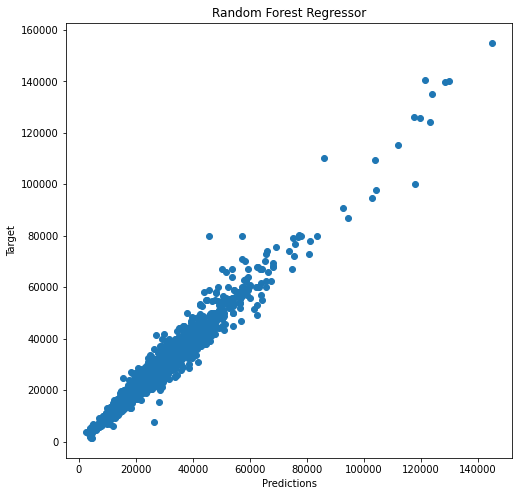

In [23]:
plt.figure(figsize=(8, 8))
plt.scatter(predictions_RandomForest, Y_test)
plt.title('Random Forest Regressor')
plt.xlabel('Predictions')
plt.ylabel('Target')